# E02: Building blocks of variable interactions

A crucial factor to consider in causal inference is the interaction among variables. Three foundational building blocks serve as the cornerstones of causal interactions: mediator, confounder, and collider effects. These interactions can intertwine and manifest concurrently, leading to more complex causal networks.  Hence, correctly capturing these interactions is key to faithfully characterizing more general causal patterns. These cases pose significant challenges for causal inference methods in the context of time series analysis and represent the fundamentals of interactions between variables. In this notebook, we will show how SURD can be applied to four different scenarios representative of the building blocks of causal interactions.

In [1]:
import os, sys
sys.path.append(os.path.abspath('../utils'))

import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors # type: ignore
import analytic_eqs as cases
import surd as surd
np.random.seed(10)

# Configure matplotlib to use LaTeX for text rendering and set font size
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

## Problem set-up

We define some important parameters for the calculation. `Nt` represents the number of time steps we will use to integrate the system over time. `samples` represents the number of samples to be used in the analysis after removing transient effects. `nbins` determines the number of states or discretization for the histograms and `nlag` specifies the time lag for performing causal analysis. The number of bins shoud be selected so that $N_{\rm{samples}} > {N_{\rm{bins}}}^d$, where $d$ represents the dimension of the pdf to be estimated.

In [2]:
Nt = 5*10**7            # Number of time steps to perform the integration of the system
samples = Nt-10000      # Number of samples to be considered (remove the transients)
nbins = 50              # Number of bins to disctrize the histogram
nlag = 1                # Time lag to perform the causal analysis

## Mediator variable

The first example corresponds to the system $Q_3 \rightarrow Q_2 \rightarrow Q_1$, where $Q_3$ acts on $Q_1$ through the mediator variable $Q_2$. The equations governing the system are as follows:
\begin{align*}
Q_1(n+1) &= \sin[Q_2(n)] + 0.001W_1(n) \\
Q_2(n+1) &= \cos[Q_3(n)] + 0.01W_2(n) \\
Q_3(n+1) &= 0.9Q_3(n) + 0.1W_3(n),
\end{align*}
where $W_i$ represents stochastic forcing on the variable and follows a Gaussian distribution with a mean of zero and a standard deviation of one. The system is initially set to $Q_1(1) = Q_2(1) = Q_3(1) = 0$.

Loaded data for mediator
SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.0297
        (1, 2, 3)   : 0.0024
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.9624
    Synergystic (S):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0004
        (2, 3)      : 0.0001
        (1, 2, 3)   : 0.0051
    Information Leak: 87.83%


SURD CAUSALITY FOR SIGNAL 3
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.0067
        (1, 2, 3)   : 0.0006
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.9718
    Synergystic (S):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0017
        (2, 3)      : 0.0002
        (1, 2, 3)   : 0.0190
    Information Leak: 94.94%


SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
  

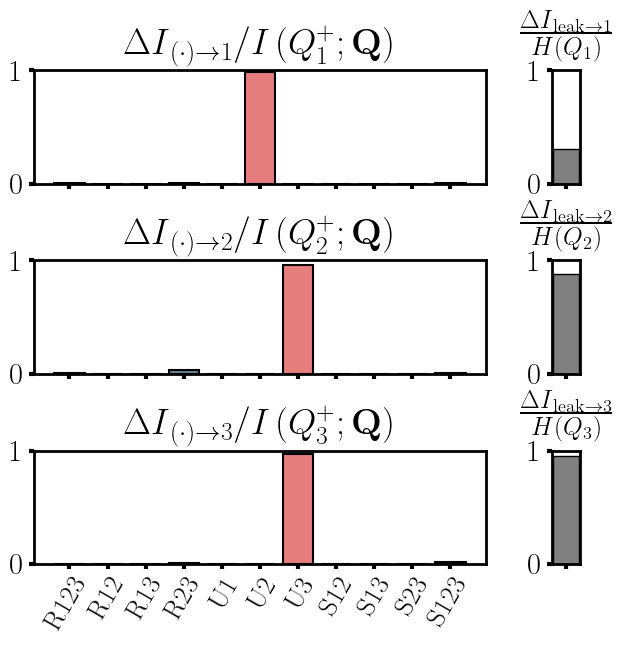

In [3]:
# Define paths for saving/loading data for each system
formatted_Nt = "{:.0e}".format(Nt).replace("+0", "").replace("+", "")
filepath = os.path.join('../data', f"mediator_Nt_{formatted_Nt}.npy")

# Check if data is saved and load it, otherwise generate and save
if os.path.isfile(filepath):
    X = np.load(filepath)
    print(f"Loaded data for mediator")
else:
    qs = cases.mediator(Nt)
    X = np.array([q[-samples:] for q in qs])
    np.save(filepath, X)
    print(f"Generated and saved data for mediator")

nvars = X.shape[0]

# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})

# Since the calculations of causalities are not coupled between variables, you can run each calculation in parallel and obtain and speed up corresponding to the number of variables
I_R, I_S, MI, info_leak = surd.run_parallel(X, nvars, nlag, nbins, axs)

# Uncomment this line and comment the previous line to run this code in series
# I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-8, h_pad=0)
plt.show()

## Confounder variable

The second example considered corresponds to a system where $Q_3$ is a confounder variable to $Q_1$ and $Q_2$, i.e., $Q_3 \rightarrow Q_1$ and $Q_3 \rightarrow Q_2$.

\begin{align*}
    Q_1(n+1) &= \sin[Q_1(n) + Q_3(n)] + 0.01W_1(n)\\
    Q_2(n+1) &= \cos[Q_2(n) - Q_3(n)] + 0.01W_2(n) \\
    Q_3(n+1) &= 0.5Q_3(n) + 0.1W_3(n)
\end{align*}

Loaded data for confounder
SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0308
        (2, 3)      : 0.0000
        (1, 2, 3)   : 0.0207
    Unique (U):
        (1,)        : 0.4119
        (2,)        : 0.0000
        (3,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0202
        (1, 3)      : 0.5160
        (2, 3)      : 0.0000
        (1, 2, 3)   : 0.0004
    Information Leak: 18.75%


Loaded data for confounder
SURD CAUSALITY FOR SIGNAL 3
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.0748
        (1, 2, 3)   : 0.0497
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.8092
    Synergystic (S):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0010
        (2, 3)      : 0.0025
        (1, 2, 3)   : 0.0628
    Information Leak: 94.71%


Loaded data for confounder
SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
    

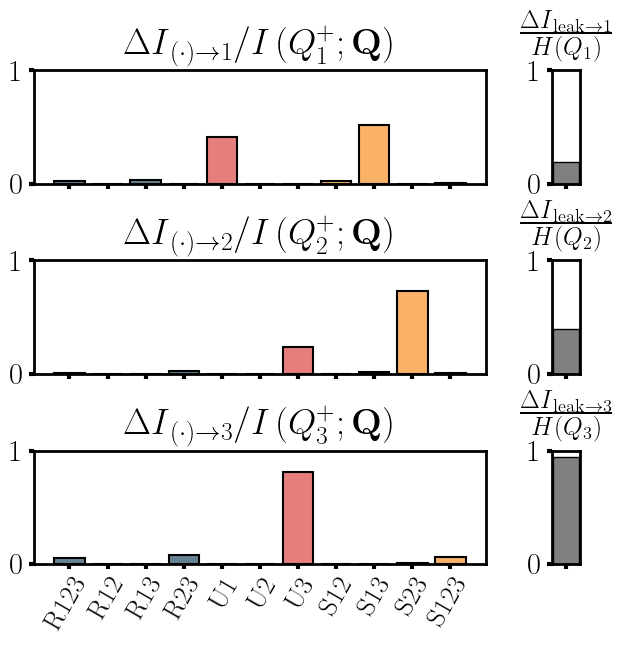

In [4]:
# Define paths for saving/loading data for each system
filepath = os.path.join('../data', f"confounder_Nt_{formatted_Nt}.npy")

# Check if data is saved and load it, otherwise generate and save
if os.path.isfile(filepath):
    X = np.load(filepath)
    print(f"Loaded data for confounder")
else:
    qs = cases.confounder(Nt)
    X = np.array([q[-samples:] for q in qs])
    np.save(filepath, X)
    print(f"Generated and saved data for confounder")

nvars = X.shape[0]

# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})
I_R, I_S, MI, info_leak = surd.run_parallel(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-8, h_pad=0)
plt.show()

## Synergistic collider

The third example considered here corresponds to the system $[Q_2,Q_3] \rightarrow Q_1$, where $Q_2$ and $Q_3$ work together to influence $Q_1$. In reality, variables $Q_2$ and $Q_3$ behave as a single random variable that drives $Q_1$.

\begin{align*}
    Q_1(n+1) &= \sin[Q_2(n)Q_3(n)] + 0.001W_1(n) \\
    Q_2(n+1) &= 0.5Q_2(n) + 0.1W_2(n) \\
    Q_3(n+1) &= 0.5Q_3(n) + 0.1W_3(n)
\end{align*}

Loaded data for synergistic
SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.1775
        (1, 2, 3)   : 0.0234
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0004
        (3,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0035
        (1, 3)      : 0.0158
        (2, 3)      : 0.7791
        (1, 2, 3)   : 0.0003
    Information Leak: 16.92%


Loaded data for synergistic
SURD CAUSALITY FOR SIGNAL 3
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0040
        (2, 3)      : 0.0000
        (1, 2, 3)   : 0.0001
    Unique (U):
Loaded data for synergistic
SURD CAUSALITY FOR SIGNAL 2        (1,)        : 0.0000

    Redundant (R):        (2,)        : 0.0000

        (3,)        : 0.9633        (1, 2)      : 0.0040

    Synergystic (S):        (1, 3)      : 0.0000

        (1, 2)      : 0.0000        (2, 3)      : 0.0000

        (1, 3)      : 0.0020    

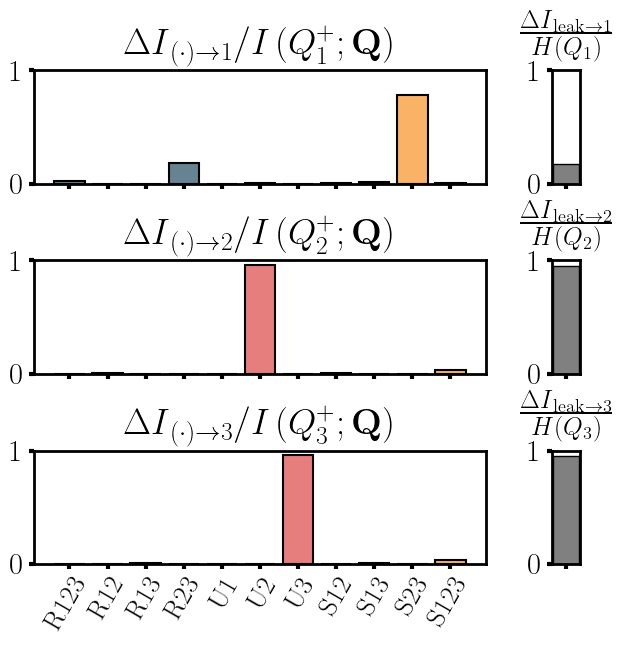

In [5]:
# Define paths for saving/loading data for each system
filepath = os.path.join('../data', f"synergistic_Nt_{formatted_Nt}.npy")

# Check if data is saved and load it, otherwise generate and save
if os.path.isfile(filepath):
    X = np.load(filepath)
    print(f"Loaded data for synergistic")
else:
    qs = cases.synergistic_collider(Nt)
    X = np.array([q[-samples:] for q in qs])
    np.save(filepath, X)
    print(f"Generated and saved data for synergistic")

nvars = X.shape[0]

# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})

I_R, I_S, MI, info_leak = surd.run_parallel(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-8, h_pad=0)
plt.show()

## Redundant collider

The last example represents the system $Q_2 \equiv Q_3 \rightarrow Q_1$, where $Q_3$ is the same as $Q_2$. In this situation, both $Q_2$ and $Q_3$ provide the same information about their influence on the future of $Q_1$.

\begin{align*}
    Q_1(n+1) &=  0.3Q_1(n) + \sin[Q_2(n)Q_3(n)] + 0.001 W_1(n)\\
    Q_2(n+1) &= 0.5 Q_2(n) + 0.1W_2(n) \\
    Q_3(n+1) &\equiv Q_2(n+1)
\end{align*}

Loaded data for redundant
SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.4518
        (1, 2, 3)   : 0.1479
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.4003
        (1, 3)      : 0.0000
        (2, 3)      : 0.0000
        (1, 2, 3)   : 0.0000
    Information Leak: 19.94%


Loaded data for redundant
SURD CAUSALITY FOR SIGNAL 2    Redundant (R):

        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (2, 3)      : 0.9864
        (1, 2, 3)   : 0.0113
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0023
        (1, 3)      : 0.0000
        (2, 3)      : 0.0000
        (1, 2, 3)   : 0.0000
    Information Leak: 95.14%


Loaded data for redundant
SURD CAUSALITY FOR SIGNAL 3
    Redundant (R):
       

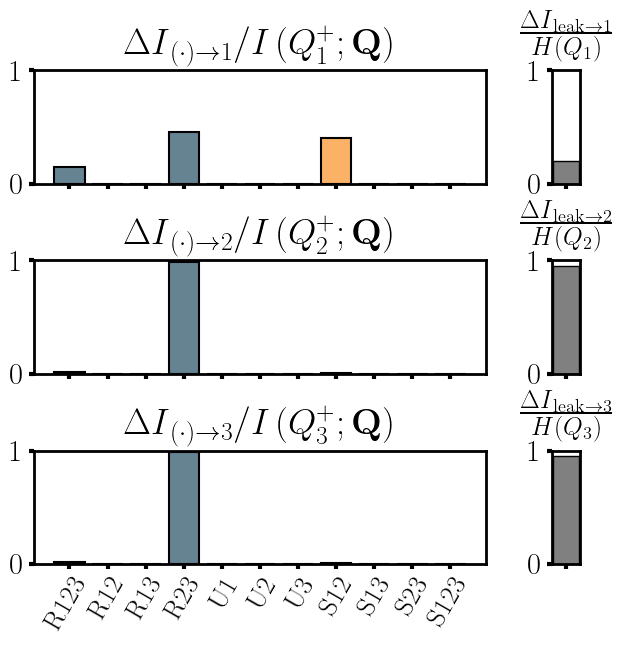

In [6]:
# Define paths for saving/loading data for each system
filepath = os.path.join('../data', f"redundant_Nt_{formatted_Nt}.npy")

# Check if data is saved and load it, otherwise generate and save
if os.path.isfile(filepath):
    X = np.load(filepath)
    print(f"Loaded data for redundant")
else:
    qs = cases.redundant_collider(Nt)
    X = np.array([q[-samples:] for q in qs])
    np.save(filepath, X)
    print(f"Generated and saved data for redundant")

nvars = X.shape[0]

# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})

I_R, I_S, MI, info_leak = surd.run_parallel(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-8, h_pad=0)
plt.show()